In [43]:
using Gadfly
using DataFrames
using Colors
using Distributions

In [44]:
date = readtable("uk.csv", separator=',', header=true)

,Date,LeaveEU,RemainEU,Undecided
1,2016-06-20,45,44,9
2,2016-06-20,45,45,8
3,2016-06-21,48,52,NA
4,2016-06-20,46,51,3
5,2016-06-16,49,42,8
6,2016-06-17,42,48,11
7,2016-06-20,47,50,3
8,2016-06-20,40,41,10
9,2016-06-17,49,48,3
10,2016-06-17,44,42,9


In [45]:
date=sort!(date)

,Date,LeaveEU,RemainEU,Undecided
1,2016-03-29,38,39,18
2,2016-03-29,43,39,18
3,2016-03-29,48,49,3
4,2016-04-01,43,44,13
5,2016-04-06,38,40,16
6,2016-04-07,35,35,30
7,2016-04-08,38,45,17
8,2016-04-08,45,42,12
9,2016-04-11,39,39,17
10,2016-04-12,34,38,28


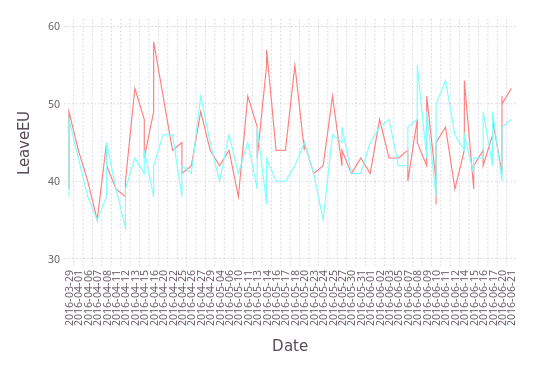

In [46]:
plot(date,layer(x="Date", y="LeaveEU", Theme(default_color=RGB(0.49,1.0,1.0)), Geom.line),
layer(x="Date", y="RemainEU", Theme(default_color=RGB(1.0,0.49,0.49)), Geom.line))

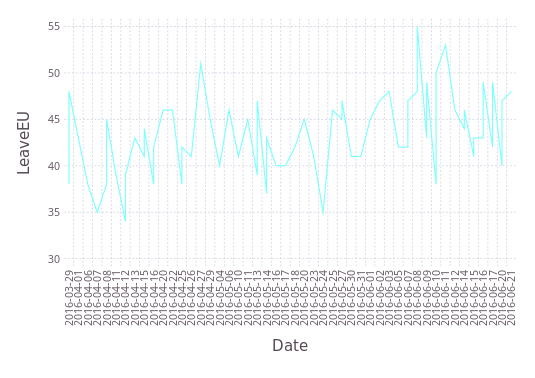

In [47]:
plot(date,x="Date", y="LeaveEU", Theme(default_color=RGB(0.49,1.0,1.0)), Geom.line)

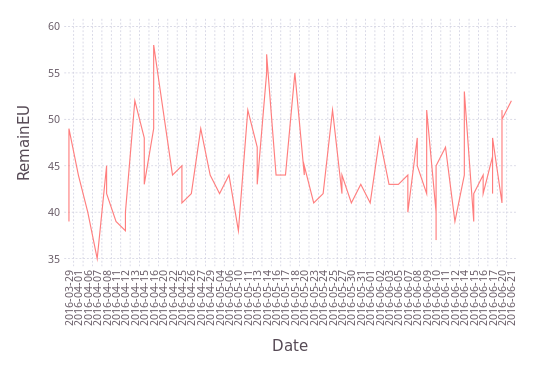

In [48]:
plot(date,x="Date", y="RemainEU", Theme(default_color=RGB(1.0,0.49,0.49)), Geom.line)

In [49]:
N = length(date[2])
M = 6
x = date[2] #Leave EU

76-element DataArrays.DataArray{Int64,1}:
 38
 43
 48
 43
 38
 35
 38
 45
 39
 34
 39
 43
 41
  ⋮
 43
 49
 42
 42
 44
 49
 40
 45
 45
 46
 47
 48

In [50]:
function c(k)
    ans = 0
    for i in k+1:N
        ans += x[i] * x[i-k]
    end
    return ans / N
end

c (generic function with 1 method)

In [51]:
C_m = zeros(M,M)

6x6 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [52]:
for i in 1:M
    for j in 1:M
        C_m[i,j] = c(abs(j-i))
    end
end

In [53]:
C_m

6x6 Array{Float64,2}:
 1919.93  1882.26  1853.5   1824.01  1801.74  1780.82
 1882.26  1919.93  1882.26  1853.5   1824.01  1801.74
 1853.5   1882.26  1919.93  1882.26  1853.5   1824.01
 1824.01  1853.5   1882.26  1919.93  1882.26  1853.5 
 1801.74  1824.01  1853.5   1882.26  1919.93  1882.26
 1780.82  1801.74  1824.01  1853.5   1882.26  1919.93

In [54]:
c_m = zeros(M)
for i in 1:M
    c_m[i] = c(i)
end
c_m

6-element Array{Float64,1}:
 1882.26
 1853.5 
 1824.01
 1801.74
 1780.82
 1760.16

In [55]:
a_m = (C_m)\(c_m)

6-element Array{Float64,1}:
  0.870353  
  0.104975  
 -0.0845735 
  0.0578553 
  0.0305192 
  0.00555481

In [56]:
sigma = c(0) - (c_m)' * a_m
sigma[1]

73.02583064052442

In [57]:
d = Normal(0,sigma[1])

Distributions.Normal{Float64}(μ=0.0, σ=73.02583064052442)

In [58]:
result = 0
for i in 1:M
    result += a_m[i]*x[end - i]
end
result

46.02608978760037

In [59]:
N = length(date[2])
M = 70
x = date[2]
println(x)
function c(k)
    ans = 0
    for i in 1:N-k
        ans += x[i] * x[i+k]
    end
    return ans / N
end
C_m = zeros(M,M)
for i in 1:M
    for j in 1:M
        C_m[i,j] = c(abs(j-i))
    end
end
C_m
c_m = zeros(M)
for i in 1:M
    c_m[i] = c(i)
end
c_m
a_m = (C_m)\(c_m)
sigma = c(0) - (c_m)' * a_m
sigma[1]
d = Normal(0,sigma[1])
result = 0
for i in 1:M
    result += a_m[i]*x[end - i]
end
result

[38,43,48,43,38,35,38,45,39,34,39,43,41,44,38,42,46,46,38,42,41,51,45,40,46,41,45,39,47,37,43,40,40,42,45,45,41,35,46,45,47,41,41,45,47,48,42,42,47,48,55,43,49,49,38,47,49,50,53,46,44,46,41,43,43,49,42,42,44,49,40,45,45,46,47,48]


49.43178257030658

In [60]:
N = length(date[3])
M = 70
x = date[3]
println(x)
function c(k)
    ans = 0
    for i in 1:N-k
        ans += x[i] * x[i+k]
    end
    return ans / N
end
C_m = zeros(M,M)
for i in 1:M
    for j in 1:M
        C_m[i,j] = c(abs(j-i))
    end
end
C_m
c_m = zeros(M)
for i in 1:M
    c_m[i] = c(i)
end
c_m
a_m = (C_m)\(c_m)
sigma = c(0) - (c_m)' * a_m
sigma[1]
d = Normal(0,sigma[1])
result = 0
for i in 1:M
    result += a_m[i]*x[end - i]
end
result

[39,39,49,44,40,35,45,42,39,38,40,52,48,43,49,58,51,44,45,41,42,49,44,42,44,38,51,47,43,55,57,44,44,55,44,45,41,42,51,42,44,41,43,41,48,43,43,44,40,48,45,42,48,51,40,37,44,45,47,39,44,53,39,42,44,42,46,48,42,48,41,44,45,51,50,52]


59.9432272333954